## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [3]:
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [29]:
# answer goes here
uber_data['trip_time'] = uber_data['trip_time'].str.split(':').apply(lambda x: round(int(x[0]) * 60 + int(x[1]) + (float(x[2]) / 60), 2))
uber_data['total_time'] = uber_data['total_time'].str.split(':').apply(lambda x: round(int(x[0]) * 60 + int(x[1]) + (float(x[2]) / 60), 2))
uber_data['wait_time'] = uber_data['wait_time'].str.split(':').apply(lambda x: round(int(x[0]) * 60 + int(x[1]) + (float(x[2]) / 60), 2))

In [30]:
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,21.55,29.0,7.45,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,19.45,26.0,6.55,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,66.88,83.0,16.12,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,13.62,20.0,6.38,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,38.90,49.0,10.10,665,13.43,21.92,3,1,0.90,1.61,0.31


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

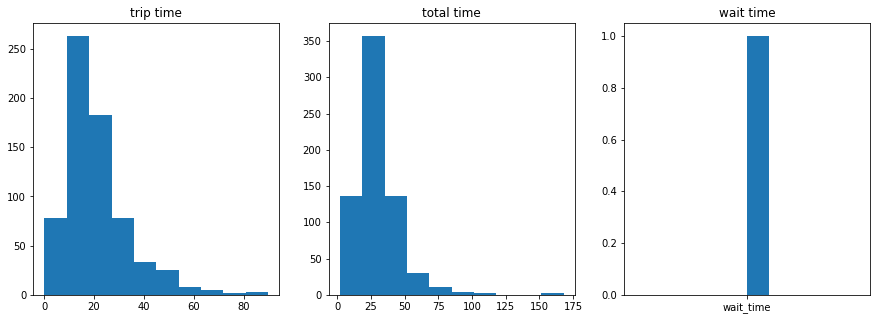

In [41]:
# answer goes here
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.hist(uber_data['trip_time'])
plt.title('trip time')
plt.subplot(1,3,2)
plt.hist(uber_data['total_time'])
plt.title('total time')
plt.subplot(1,3,3)
plt.hist('wait_time')
plt.title('wait time')
plt.show()

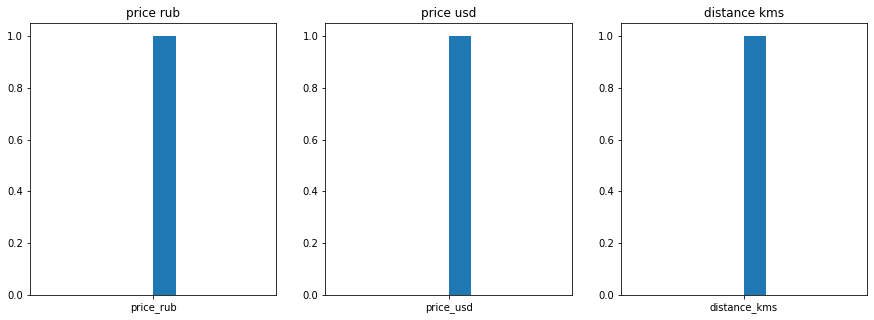

In [40]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.hist('price_rub')
plt.title('price rub')
plt.subplot(1,3,2)
plt.hist('price_usd')
plt.title('price usd')
plt.subplot(1,3,3)
plt.hist('distance_kms')
plt.title('distance kms')
plt.show()

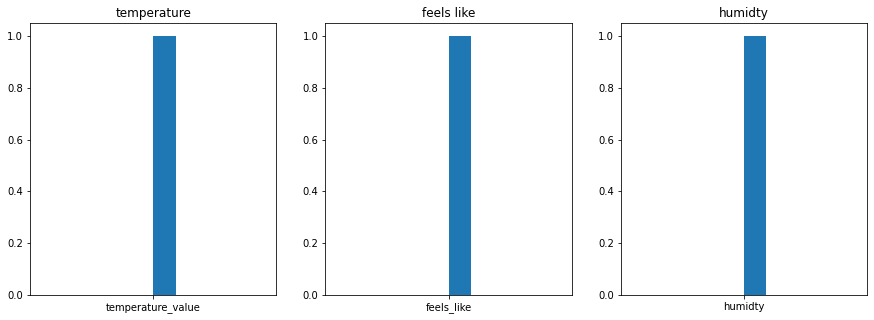

In [39]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.hist('temperature_value')
plt.title('temperature')
plt.subplot(1,3,2)
plt.hist('feels_like')
plt.title('feels like')
plt.subplot(1,3,3)
plt.hist('humidty')
plt.title('humidty')
plt.show()

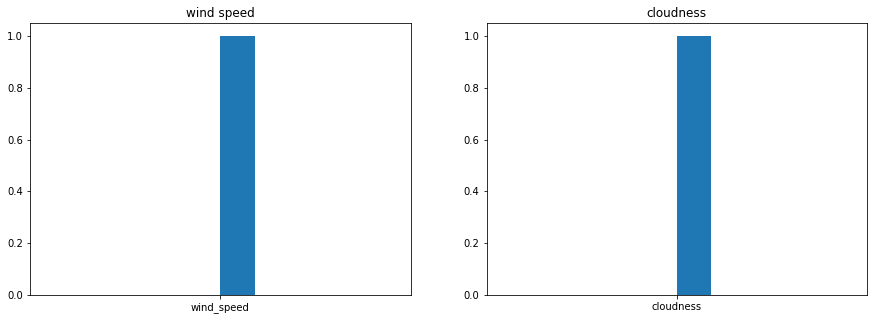

In [38]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.hist('wind_speed')
plt.title('wind speed')
plt.subplot(1,2,2)
plt.hist('cloudness')
plt.title('cloudness')
plt.show()

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

In [44]:
# answer goes here
threshold = 1.5
q75, q25 = np.percentile(uber_data['trip_time'], [75 ,25])
iqr = q75 - q25
min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)
    
print("The score threshold is: {}".format(threshold))
print("Number of outliers is: {}".format(
      len((np.where((uber_data['trip_time'] > max_val) 
                    | (uber_data['trip_time'] < min_val))[0]))
    ))


print(((np.where((uber_data['trip_time'] > max_val) 
                    | (uber_data['trip_time'] < min_val))[0]))
    )

The score threshold is: 1.5
Number of outliers is: 30
[  2  13  29  45  47  79 106 108 117 201 253 277 291 339 367 411 413 414
 432 472 473 474 519 520 590 591 600 601 646 647]


In [48]:
q75, q25

(26.4725, 12.47)

There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

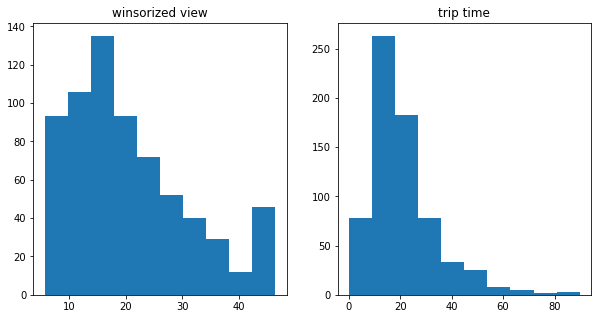

In [57]:
# answer goes here
from scipy.stats.mstats import winsorize

winsorized_views = winsorize(uber_data['trip_time'], (0.05, 0.05))

winsorized_views
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.hist(winsorized_views)
plt.title('winsorized view')
plt.subplot(1,2,2)
plt.hist(uber_data['trip_time'])
plt.title('trip time')
plt.show()
